# Receiver Operating Characteristic (ROC) Curve

By Juan José Murillo Fuentes. 2020. Universidad de Sevilla

We propose an example of ROC where a BPSK transmission is used. BPSK in AWGN channel is a quite simple model where $pm a$ values are sent and a zero mean Gaussian noise is added. At reception we must decide if a $-a$ or a $+a$ was transmitted. For the purpose of illustrating the ROC we can state that, e.g. and without loss of generality, we want to detect $-a$ transmissions.

Generate a simple case with two Gaussians at $\pm 1$, a typical example of this system can be found in digital communications for a BPSK, that can be seen as 
$$X = B + N$$
where $B$ has values-a and a with equal probability and $N$ is distributed as Gaussian, modeling additive white noise (AGWN). 

Based on the notebook by Syed Sadat Nazrul. See references. Here bad corresponds to $a$ while good to $-a$.

## Running this code

This notebook is in github at https://github.com/jjmurillo/macler/blob/main/Examples/ROC.ipynb

You may open this notbook at 

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jjmurillo/macler/blob/main/Examples/ROC.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

Also, you can try Binder, there go into the Examples folder. [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jjmurillo/macler/main)



## Some code for representation

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
def pdf(x,  mean, std):
    partitionFunc = 1.0 / np.sqrt(2*np.pi*(std**2))
    pdf_normal_dist = partitionFunc*np.exp(-((x-mean)**2)/(2.0*(std**2)))
    return pdf_normal_dist
x = np.linspace(-5, 5, num=100)
good_pdf = pdf(x,1,0.8)
bad_pdf = pdf(x,-1,0.8)

Write a function to plot them

In [21]:
def plot_pdf(good_pdf, bad_pdf, ax):
    ax.fill(x, good_pdf, "g", alpha=0.5)
    ax.fill(x, bad_pdf,"b", alpha=0.5)
    ax.set_xlim([-4,4])
    ax.set_ylim([0,0.7])
    ax.set_title("Probability Distribution", fontsize=14)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_xlabel('P(X="bad")', fontsize=12)
    ax.legend(["good","bad"])

 Use the function

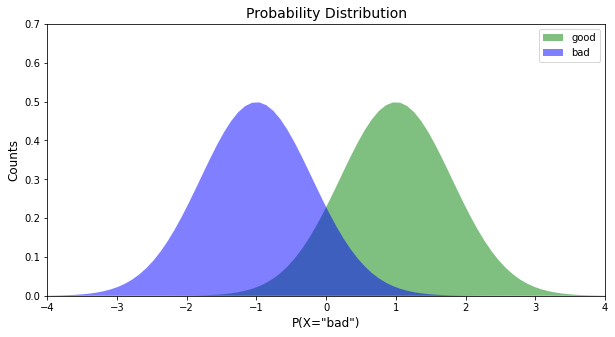

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
plot_pdf(good_pdf, bad_pdf, ax)

# Deriving ROC Curve
To derive the ROC curve from the probability distribution, we need to calculate the True Positive Rate (TPR) and False Positive Rate (FPR). For a simple example, let’s assume the threshold is at 0.0.

Let us assume also that we want to detect "bad" cases.

Draw a vertical line at 0.0. True positive is the area of the blue Gaussian to the right of this line. False positive is the area under the green curve to the right of the threshold. 

We compute
$$ TPR=sensitivity=Recall=\frac{t_p}{t_p + f_n} $$

On the other hand, true negative are points to the left of the threshold under the green curve, while false negative are the points to the left under the blue curve:
$$ FPR=\frac{f_p}{t_n+f_p}$$


The ROC computes the curve TPR vs FPR for every value of the threshold


In [23]:
def plot_roc(good_pdf, bad_pdf, ax):
    #Total
    total_bad = np.sum(bad_pdf)
    total_good = np.sum(good_pdf)
    #Cumulative sum
    cum_TP = 0
    cum_FP = 0
    #TPR and FPR list initialization
    TPR_list=[]
    FPR_list=[]
    #Iteratre through all values of x
    for i in range(len(x)):  #All possible values of thresholds
        #We are only interested in non-zero values of bad
        if bad_pdf[i]>0:
            cum_TP+=bad_pdf[len(x)-1-i]
            cum_FP+=good_pdf[len(x)-1-i]
        FPR=cum_FP/total_good
        TPR=cum_TP/total_bad
        TPR_list.append(TPR)
        FPR_list.append(FPR)
    #Calculating AUC, taking the 100 timesteps into account
    aux=TPR_list[0:-1]*np.diff(FPR_list)
    auc=np.sum(aux)
    #Plotting final ROC curve
    ax.plot(FPR_list, TPR_list)
    ax.plot(x,x, "--")
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_title("ROC Curve", fontsize=14)
    ax.set_ylabel('TPR', fontsize=12)
    ax.set_xlabel('FPR', fontsize=12)
    ax.grid()
    ax.legend(["AUC=%.3f"%auc])

Now let’s use this plot_roc function to generate the plot:

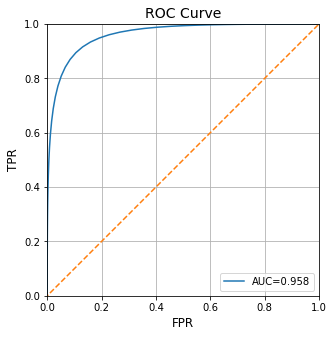

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.axis('square')
plot_roc(bad_pdf,good_pdf, ax)

Where AUC denotes Area Under The Curve.

Now plotting the probability distribution and the ROC next to each other for visual comparison:

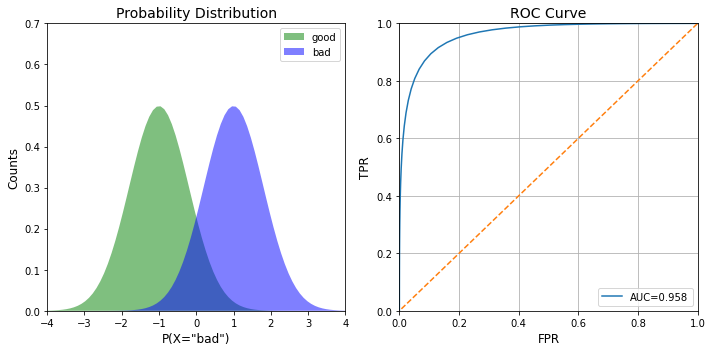

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
plot_pdf(bad_pdf, good_pdf, ax[0])
plot_roc(bad_pdf, good_pdf, ax[1])
plt.tight_layout()
fig.savefig('ROC.pdf')

## Effect of Class Separation
Now that we can derive both plots, let’s see how the ROC curve changes as the class separation (i.e. the model performance) improves. We do this by altering the mean value of the Gaussian in the probability distributions.

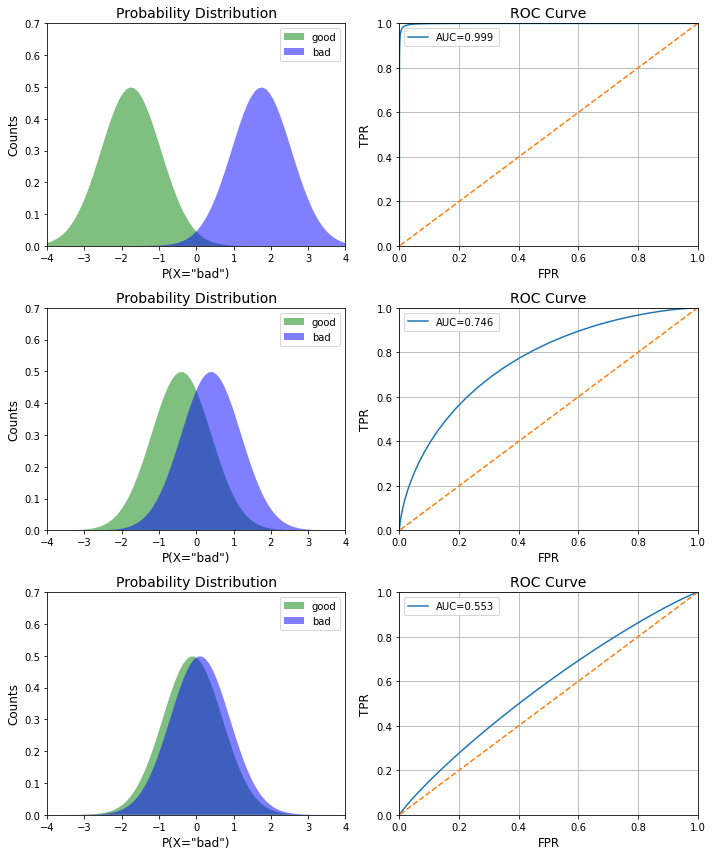

In [27]:
x = np.linspace(-5, 5, num=100)
fig, ax = plt.subplots(3,2, figsize=(10,12))

means_tuples = [(-1.75,1.75),(-0.4,0.4),(-.1,0.1)]
i=0
for  bad_mean , good_mean in means_tuples:
    good_pdf = pdf(x, good_mean,0.8,)
    bad_pdf  = pdf(x, bad_mean,0.8,)
    plot_pdf(bad_pdf,good_pdf, ax[i,0])
    plot_roc(bad_pdf,good_pdf, ax[i,1])
    i+=1
plt.tight_layout()
fig.savefig('ROCmean.pdf')

If the Gaussians are near no matter the value of the threshold the result will be pretty bad. On the contrary, if they are quite separared, the TPR will be 1 while the FPR is 0, then will move to the opposite scenario.

## References
See also https://towardsdatascience.com/receiver-operating-characteristic-curves-demystified-in-python-bd531a4364d0
by Syed Sadat Nazrul, from where some lines where borrowed. We fixed some errors, changed mean and std as arguments. Changed also the means of the examples. Changed text. Changed the computation of the the AUC as it was not giving right values...